In [1]:
# Below we have sections of short driver scripts that run different parts of the heatmap code
# Not all functions in the 5 functiond definition .py's are called yet,
# but the ones that are called so far compile below without error

In [2]:
import importlib
import setup_nx # your own module, setup.nx.py
import numpy as np
import math as m
import statistics as st
import cmath
import matplotlib.pyplot as plt 
import itertools
from operator import add
importlib.reload(setup_nx)
from setup_nx import *
from graphviz import Source, render

import datetime
import time

import my_feeder_funcs as ff
import my_impedance_funcs as imp
import my_configVis_funcs as vis
import my_detControlMatExistence_funcs as ctrl
import my_detLznRange_funcs as lzn
import my_heatmapSetup_funcs as hm


<class 'module'>


In [3]:
# List functions in each helper .py
help(ff)
print("----------------------------------------------------------")
help(imp)
print("----------------------------------------------------------")
help(vis)
print("----------------------------------------------------------")
help(lzn)
print("----------------------------------------------------------")
help(hm)
print("----------------------------------------------------------")
help(ctrl)

Help on module my_feeder_funcs:

NAME
    my_feeder_funcs - # Hi

FUNCTIONS
    add(a, b, /)
        Same as a + b.
    
    feeder_init(modelpath, loadfolder, loadpath, timesteps, Vbase_ll, Sbase, depths, leaves)
    
    make_graph(feeder, file_name)
    
    nx_plot(feeder)

FILE
    c:\users\jaimi\documents\matlab\research\energise\local_heatmap_pythoncode\my_feeder_funcs.py


----------------------------------------------------------
Help on module my_impedance_funcs:

NAME
    my_impedance_funcs

FUNCTIONS
    add(a, b, /)
        Same as a + b.
    
    get_XR_ratio(feeder, node_name, depths)
        #Returns the X/R ratio from a node up to the substation
    
    get_total_impedance_between_two_buses(feeder, node_name_1, node_name_2, depths)
    
    get_total_impedance_from_substation(feeder, node_name, depths)
    
    plot_histogram_XR_ratios(feeder, leaves, slack_bus, depths, leaves_only=False)

FILE
    c:\users\jaimi\documents\matlab\research\energise\local_heatmap_python

In [4]:
# [Essential] specify input feeder data

#-----------------------------------------------------------------
'specifying file paths'
# Enter the path/name of the model's excel file and import
    # All GridBright load files should be in the following folder
    #loadfolder = "/Users/jasperpakshong/Documents/Berkeley/ENERGISE/IEEE13/"
    #loadpath = loadfolder + "IEEE13testload_w_extreme_act.xlsx"

    # filepath = "IEEE13/"
    # modelpath = filepath + "001 phasor08_IEEE13_OPAL.xls"
    # loadfolder = "IEEE13/"
    # loadpath = loadfolder + "001_phasor08_IEEE13_norm03_HIL_7_1.xlsx"

    #filepath = "AL0001/"
    #modelpath = filepath + "AL0001_OPAL_working.xls"
    #loadfolder = "AL0001/"
    #loadpath = loadfolder + "AL0001_tvload_afternoon1h.csv"
    
    #filepath = "13NF_balanced/"
    #modelpath = filepath + "016 GB_IEEE13_balance_all_ver2.xls"
    #loadfolder = "13NF_balanced/"
    #loadpath = loadfolder + "016 GB_IEEE13_balance all ver2_time_sigBuilder_secondWise_norm03.csv"

filepath = "13NF_balanced/"
modelpath = filepath + "impedMod_IEEE13 unbal copy.xlsx" #"016 GB_IEEE13_balance_all_ver2.xls"
loadfolder = "13NF_balanced/"
loadfile = "016 GB_IEEE13_balance all ver2_time_sigBuilder_secondwise_norm03.csv"
loadpath = loadfolder + loadfile

#==========================================================================================================

'specifying file name'
#file_name = string specifying name of dot file created when make_graph() is called
file_name = '13NF_test.dot'

#==========================================================================================================

'list actuator locations and performance node'
# all_act_locs = list of node names as strings where actuators will be placed
all_act_locs = ['bus_651','bus_611','bus_633']
perf_nodes = ['bus_651','bus_611','bus_633']

#==========================================================================================================

'Specify substation kV, kVA bases, name, and the number of timesteps in the load data'
Vbase_ll = 4160
Vbase = Vbase_ll / np.sqrt(3)
Sbase = 5000/3
substation_name = 'bus_650'
timesteps = 1

'DO NOT NEED TO EDIT THIS CELL BEFORE RUNNING'

ts = time.time()
print()
print(datetime.datetime.fromtimestamp(ts))

plot = 0 #turn plot on/off

depths = {}
leaves = []


2020-07-14 10:18:34.672191


  File "C:\Users\jaimi\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\jaimi\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\jaimi\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\jaimi\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\jaimi\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\Users\jaimi\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 153, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\jaimi\Anaconda3\lib\asyncio\base_events.py", line 538, in run_forever
    self._run_once()
  File "C:\Users\jaimi\Anaconda3\lib\asyncio\base_events.py", line 1782, in _run_once
    handle._run()
  File "C:\Users\jaimi\Anaconda3\lib\asyncio\events.py", line 88, in _r

Finished initializing feeder
{'bus_650': 0, 'bus_651': 1, 'bus_632': 2, 'bus_671': 3, 'bus_633': 3, 'bus_645': 3, 'bus_680': 4, 'bus_684': 4, 'bus_692': 4, 'bus_634': 4, 'bus_646': 4, 'bus_611': 5, 'bus_652': 5, 'bus_675': 5}
bus_611
bus_632
bus_633
bus_634
bus_645
bus_646
bus_650
bus_651
bus_652
bus_671


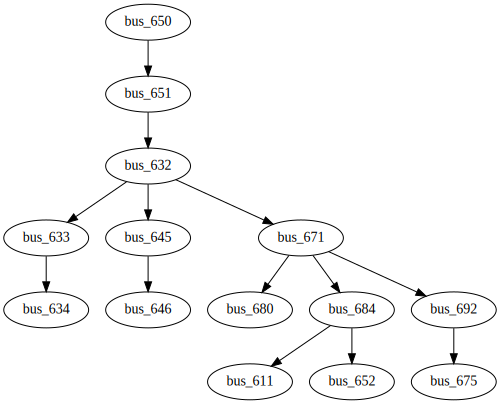

In [5]:
# [ESSENTIAL] create feeder obj
fin_feeder = ff.feeder_init(modelpath,loadfolder,loadpath,timesteps,Vbase_ll,Sbase,depths,leaves)
print("Finished initializing feeder")
ff.make_graph(fin_feeder, file_name)

print(depths) # should be populated

count = 0 # print list of buses in network
for i in fin_feeder.network:    
    print(i) 
    count += 1
    if count >= 10:
        break
    
Source.from_file(file_name)
#^ need this to plot feeder

{'bus_650': 0, 'bus_651': 1, 'bus_632': 2, 'bus_671': 3, 'bus_633': 3, 'bus_645': 3, 'bus_680': 4, 'bus_684': 4, 'bus_692': 4, 'bus_634': 4, 'bus_646': 4, 'bus_611': 5, 'bus_652': 5, 'bus_675': 5}
{'Phase 1': (0.3281250634199999+0.963920640852j), 'Phase 2': (0.31960233450000003+0.9922350402640001j), 'Phase 3': (0.323295517032+0.979924431824j)}
{'Phase 1': (0.2025190042+0.49744334100000004j), 'Phase 2': (0.19862695750000003+0.5103694815j), 'Phase 3': (0.19973491240000002+0.5066668288j)}
{'Phase 1': (0.13125004199999998+0.3855683052j), 'Phase 2': (0.32841677176000006+0.60248504128j), 'Phase 3': (0.33074253008+0.59607594832j)}
{'Phase 1': (0.33771597558+0.8482331038320001j), 'Phase 2': (0.2556818595+0.793788007064j), 'Phase 3': (0.409693271952+0.937041842344j)}
{'Phase 1': (0.54112513158+0.9258694923120001j), 'Phase 2': (0.2556818595+0.793788007064j), 'Phase 3': (0.334170520512+0.860479317844j)}
{'Phase 1': (0.33808718781999997+0.813399759352j), 'Phase 2': (0.33040726220000005+0.832055064

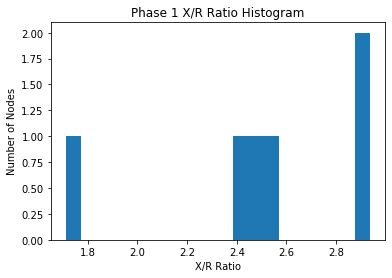

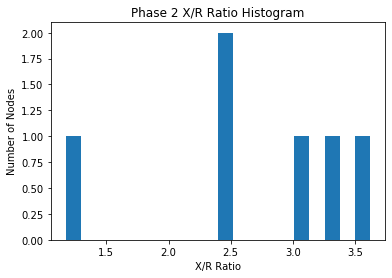

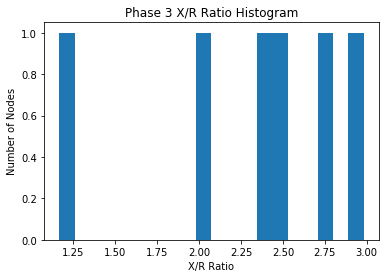

Z between buses:
{'Phase 1': (0.20646593357999998+0.46266479863200005j), 'Phase 2': (0.12784090950000002+0.396893940664j), 'Phase 3': (0.204852297312+0.468509495444j)}

Z to substation:
{'Phase 1': (0.13125004199999998+0.3855683052j), 'Phase 2': (0.12784095+0.3968940664j), 'Phase 3': (0.1293182232+0.3919698224j)}

X/R ratio of path to substation:
{'Phase 1': (0.13125004199999998+0.3855683052j), 'Phase 2': (0.12784095+0.3968940664j), 'Phase 3': (0.1293182232+0.3919698224j)}
{'Phase 1': 2.937662337662338, 'Phase 2': 3.016, 'Phase 3': 2.981546572934974}


In [6]:
# [Optional] run impedance-related functions
slack_bus = None
for bus_name, depth in depths.items():
    if depth == 0:
        slack_bus = bus_name
        break
print(depths)
# modify node names when change feeders
imp.plot_histogram_XR_ratios(fin_feeder,leaves,slack_bus,depths,leaves_only = True)
print('Z between buses:')
print(imp.get_total_impedance_between_two_buses(fin_feeder, 'bus_632', 'bus_684',depths))
print('\nZ to substation:')
print(imp.get_total_impedance_from_substation(fin_feeder, 'bus_632',depths))
print('\nX/R ratio of path to substation:')
print(imp.get_XR_ratio(fin_feeder, 'bus_632',depths))
# should check on how to format the printing do that it's to like 2 decimal places

In [7]:
node_index = hm.createNodeIndexMap(fin_feeder) #node indices for indicMat and F matrix
feas_configs, lzn_error = hm.runHeatMapProcess(fin_feeder, all_act_locs, perf_nodes, node_index,depths)   
#^runHeatMapProcess doesnt work, has error talking about "unhashable type: 'list'"

TypeError: unhashable type: 'list'

In [ ]:
# Create figure 2
ratios = vis.phaseCouplingPerNode(fin_feeder,depths)
vis.createColorMap(fin_feeder, ratios)
Source.from_file('colorMap')

In [ ]:
# detLznRange(feeder, Vbase_ll, Sbase, z12, act_locs)
#^ calls computePQsweep, makePVcurve, makeQVcurve, computeLznItvl
loadfolder = "13NF_balanced/"
load_data = '001_phasor08_IEEE13_time_PVpen50_cloud_minutewise (1).csv'

lzn.computePQsweep_timesteps(fin_feeder, loadfolder+load_data)


In [ ]:
# evaluate one config

In [ ]:
# Evaluate detControlMatExistence
# bogus data just to run through it:

n=1 # Temp
A = np.identity(6*n)
sz=(6*n,6*n)
B=np.ones(sz) # TEMP: replace with call to createRXmatrices_3ph
indicMat=np.identity(6*n) # TEMP: replace with actual config you want to evaluate
#act_locs=
#perf_nodes=
#feeder=

MYfeas,MYfeasFs,MYnumfeas,MYnumTried,MYnumact=ctrl.detControlMatExistence(A, B, indicMat)
#MYfeas,MYfeasFs,MYnumfeas,MYnumTried,MYnumact=detControlMatExistence(feeder, act_locs, perf_nodes,A, B, indicMat):

print("--------------------- Outputs ----------------------")
print("Myfeas=",MYfeas)
print("MyfeasFs=\n",MYfeasFs)
print("Mynumfeas=",MYnumfeas)
print("MynumTried=",MYnumTried)
print("Mynumact=",MYnumact)

print('computeFeas_v1 returns:')
hm.computeFeas_v1(fin_feeder, perf_nodes, A, B, indicMat,substation_name,depths)
